<a href="https://colab.research.google.com/github/Paula-Bautista/Proyecto-Final/blob/main/Random_Walks_Nov_12_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
##
import networkx as nx

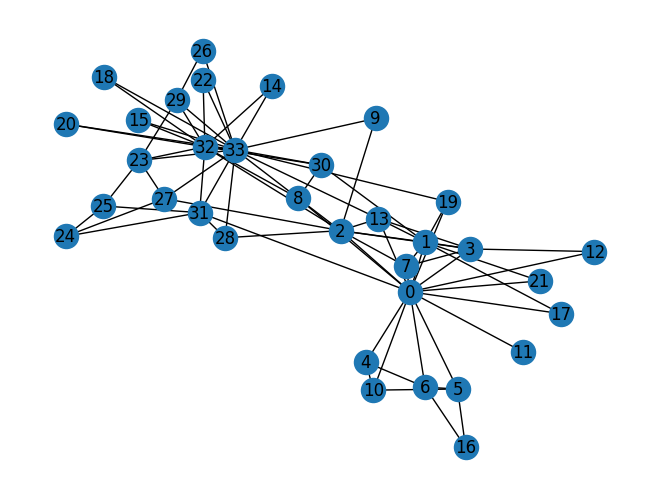

In [ ]:
G=nx.karate_club_graph()
Nv=len(G)
matA=1.0*nx.adjacency_matrix(G).todense()
nx.draw(G,with_labels=True)

In [ ]:
matW = np.zeros([Nv,Nv])

In [ ]:
for i in range(Nv):
    matW[i] = matA[i]/sum(matA[i])

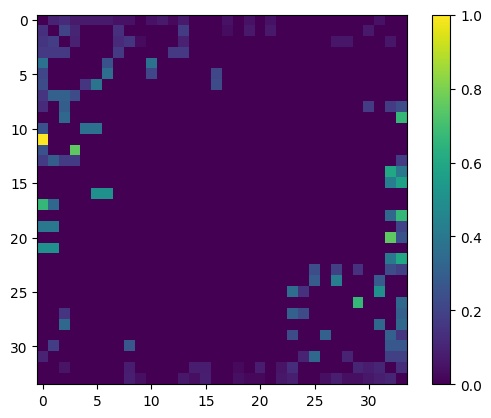

In [ ]:
plt.imshow(matW)
plt.colorbar()
plt.show()

In [ ]:
Degrees = sum(matA)

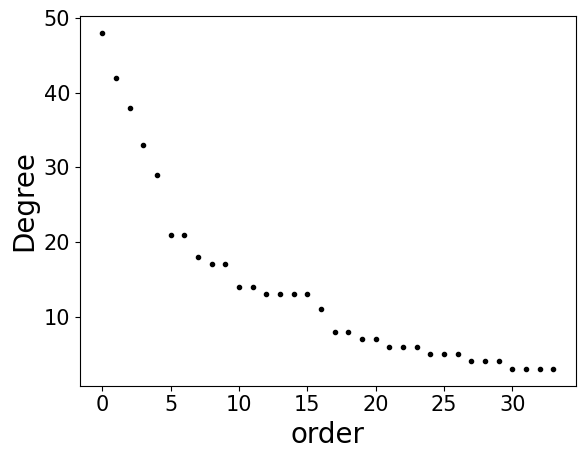

In [ ]:
plt.plot(np.sort(Degrees)[::-1],'k.')
plt.xlabel(r'order',size = 20)
plt.ylabel(r'Degree',size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
Nodes = list(range(Nv))
pos = 11
for i in range(10):
    pos = np.random.choice(Nodes,p = matW[pos])
    print(pos)

0
11
0
10
0
6
5
10
5
6


In [ ]:
Nodes = list(range(Nv))
pos = 11
Visited = [pos]
while len(Visited) != Nv:
    pos = np.random.choice(Nodes,p = matW[pos])
    if pos not in Visited:
        Visited.append(pos)
        print(len(Visited))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [ ]:
def CoverTime(initial):
    Nodes = list(range(Nv))
    pos = int(initial)
    Visited = [pos]
    time = 0
    while len(Visited) != Nv:
        time += 1
        pos = np.random.choice(Nodes,p = matW[pos])
        if pos not in Visited:
            Visited.append(pos)
    return time

In [ ]:
CoverTime = np.vectorize(CoverTime)

In [ ]:
Data = CoverTime(11*np.ones(10000))

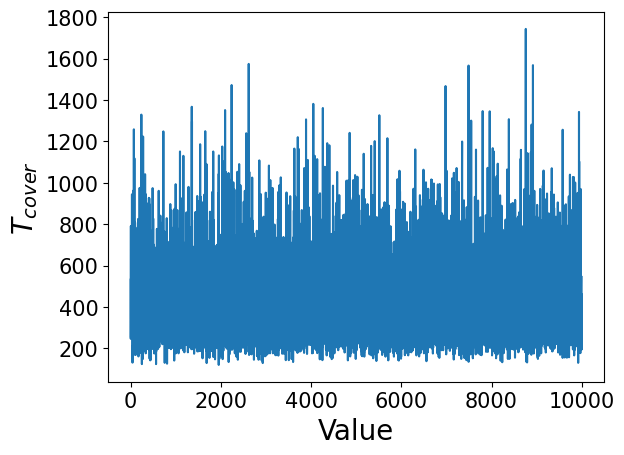

In [ ]:
plt.plot(Data)
plt.xlabel(r'Value',size=20)
plt.ylabel(r'$T_{cover}$',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

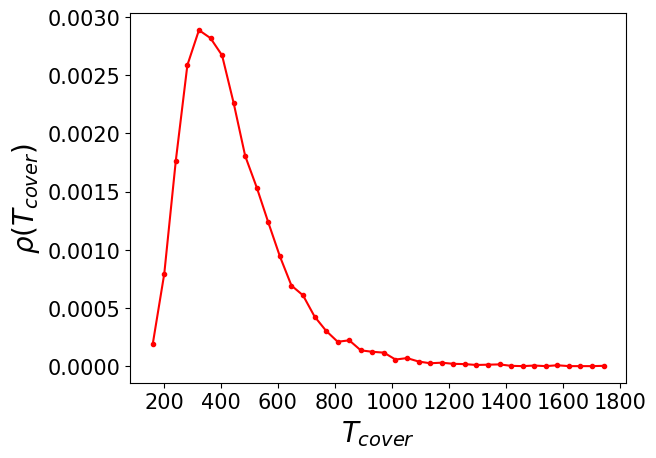

In [ ]:
freqs,base=np.histogram(Data,bins=40,density=True)
plt.plot(base[1:],freqs,'r.-',label='Monte Carlo')
plt.xlabel(r'$T_{cover}$',size=20)
plt.ylabel(r'$\rho(T_{cover})$',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
Nodes = list(range(Nv))
pos = np.random.choice(Nodes)
Positions = [pos]
for i in range(180000):
    pos = np.random.choice(Nodes,p = matW[pos])
    Positions.append(pos)

In [ ]:
vals, freqs = np.unique(Positions, return_counts=True)

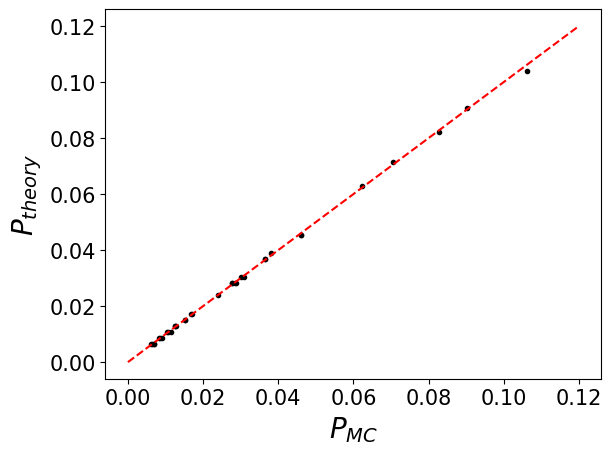

In [ ]:
plt.plot(freqs/sum(freqs),Degrees/sum(Degrees),'k.')
plt.plot([0,0.12],[0,0.12],'r--')
plt.xlabel(r'$P_{MC}$',size=20)
plt.ylabel(r'$P_{theory}$',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

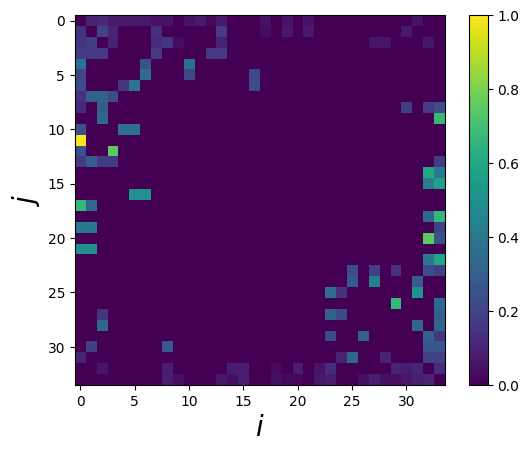

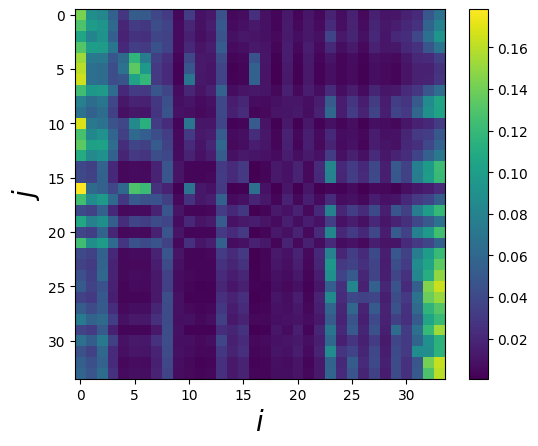

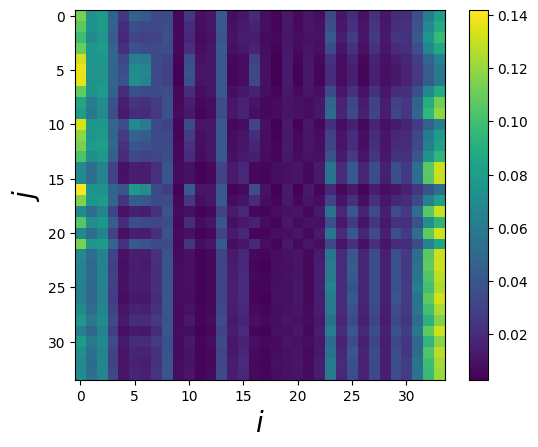

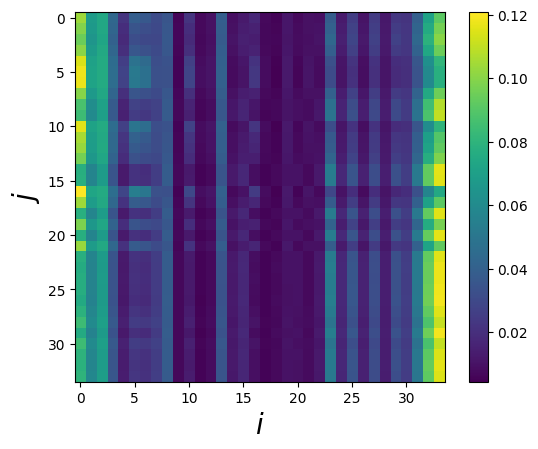

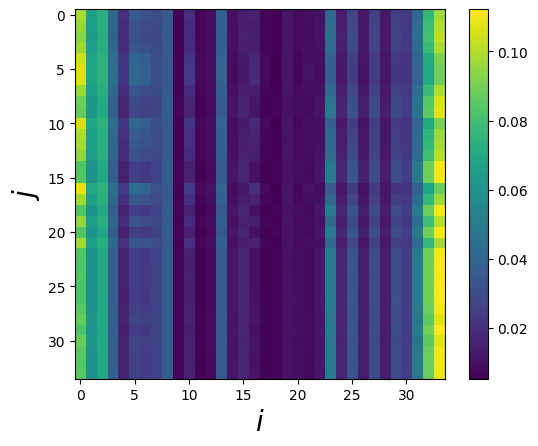

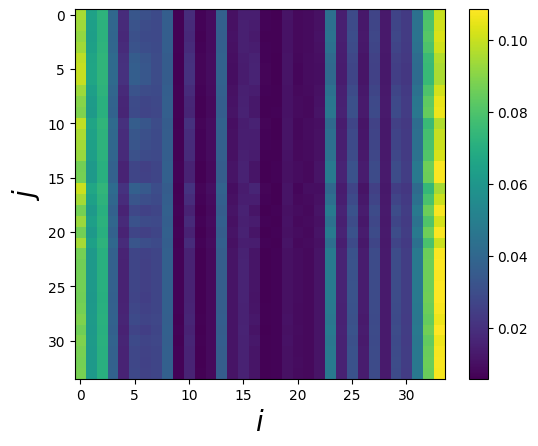

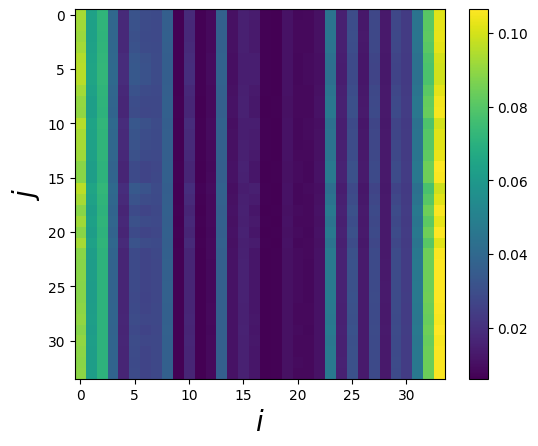

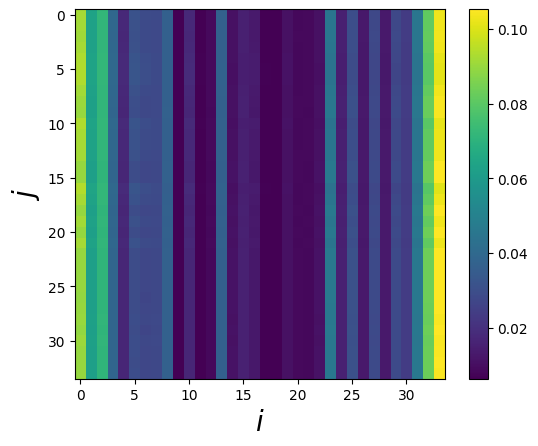

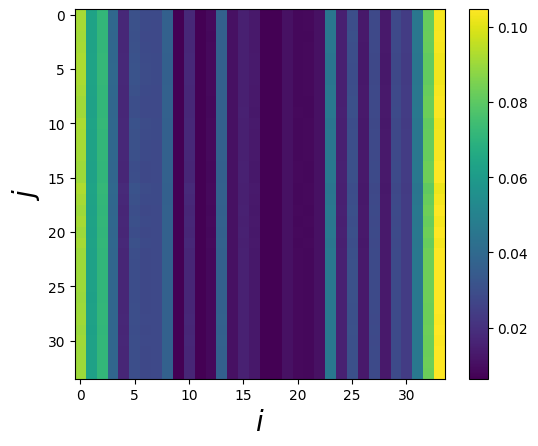

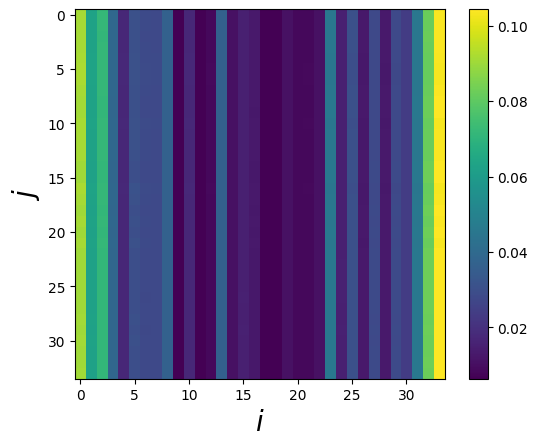

<Figure size 640x480 with 0 Axes>

In [ ]:
for t in range(1,50,5):
    matP = np.linalg.matrix_power(matW,t)
    plt.imshow(matP)
    plt.colorbar()
    plt.xlabel(r'$i$',size=20)
    plt.ylabel(r'$j$',size=20)
    plt.show()
    plt.clf()